In [49]:
import pandas as pd

In [50]:
csv_18 = pd.read_csv('/mnt/c/Users/frdnp/Desktop/Projects/dermoscopic-melanoma-classification/data/splits/ISIC2018_Task3_Training_GroundTruth.csv')
csv_18['dataset'] = 'ISIC_2018'
csv_19 = pd.read_csv('/mnt/c/Users/frdnp/Desktop/Projects/dermoscopic-melanoma-classification/data/splits/ISIC_2019_Training_GroundTruth.csv')
csv_19['dataset'] = 'ISIC_2019'
csv_20 = pd.read_csv('/mnt/c/Users/frdnp/Desktop/Projects/dermoscopic-melanoma-classification/data/splits/ISIC_2020_Training_GroundTruth.csv')
csv_20['dataset'] = 'ISIC_2020'
csv_20.rename(columns={'image_name': 'image'}, inplace=True)

csv_18.drop(index=csv_18[csv_18['image'].str.contains('_downsampled')].index, inplace=True)
csv_19.drop(index=csv_19[csv_19['image'].str.contains('_downsampled')].index, inplace=True)
csv_20.drop(index=csv_20[csv_20['image'].str.contains('_downsampled')].index, inplace=True)

In [51]:
combined_mel = pd.concat([
    csv_19.loc[csv_19['MEL'] == 1.0, ['image','dataset']],
    csv_20.loc[csv_20['benign_malignant'] == 'malignant', ['image','dataset']],
    csv_18.loc[csv_18['MEL'] == 1.0, ['image','dataset']]
]).reset_index(drop=True)

combined_mel = pd.DataFrame(combined_mel, columns=['image', 'dataset'])
combined_mel.drop_duplicates(subset=['image'],inplace=True)
combined_mel['label'] = 1.0

In [52]:
combined_mel['dataset'].value_counts()

dataset
ISIC_2019    4148
ISIC_2020     584
Name: count, dtype: int64

In [53]:
combined_nv = pd.concat([
    # csv_18[csv_18['NV']==1.0].sample(combined_mel['dataset'].value_counts()['ISIC_2018'], random_state=42)[['image','dataset']],
    csv_19[csv_19['NV']==1.0].sample(combined_mel['dataset'].value_counts()['ISIC_2019'], random_state=42)[['image','dataset']],
    csv_20[csv_20['benign_malignant']=='benign'].sample(combined_mel['dataset'].value_counts()['ISIC_2020'], random_state=42)[['image','dataset']]
]).reset_index(drop=True)
combined_nv = pd.DataFrame(combined_nv, columns=['image', 'dataset'])
combined_nv.drop_duplicates(subset=['image'],inplace=True)
combined_nv['label'] = 0.0

In [54]:
combined_mel.shape, combined_nv.shape

((4732, 3), (4732, 3))

In [60]:
combined_dataset = pd.concat([combined_mel, combined_nv], ignore_index=True)
combined_dataset.reset_index(drop=True, inplace=True)
combined_dataset['image_path'] = combined_dataset['image'].apply(lambda x: f'../data/raw/train/images/{x}.jpg')

In [61]:
combined_dataset

,image,dataset,label,image_path
0,ISIC_0000002,ISIC_2019,1.0,../data/raw/train/images/ISIC_0000002.jpg
1,ISIC_0000004,ISIC_2019,1.0,../data/raw/train/images/ISIC_0000004.jpg
2,ISIC_0000013,ISIC_2019,1.0,../data/raw/train/images/ISIC_0000013.jpg
3,ISIC_0000074,ISIC_2019,1.0,../data/raw/train/images/ISIC_0000074.jpg
4,ISIC_0000157,ISIC_2019,1.0,../data/raw/train/images/ISIC_0000157.jpg
...,...,...,...,...
9459,ISIC_3981425,ISIC_2020,0.0,../data/raw/train/images/ISIC_3981425.jpg
9460,ISIC_7199167,ISIC_2020,0.0,../data/raw/train/images/ISIC_7199167.jpg
9461,ISIC_2906486,ISIC_2020,0.0,../data/raw/train/images/ISIC_2906486.jpg
9462,ISIC_6143791,ISIC_2020,0.0,../data/raw/train/images/ISIC_6143791.jpg


In [ ]:
from sklearn.model_selection import train_test_split
train_dataset, test_dataset = train_test_split(combined_dataset, test_size=0.2, random_state=42, stratify=combined_dataset['label'])
train_dataset.reset_index(drop=True, inplace=True)
test_dataset.reset_index(drop=True, inplace=True)
# train_dataset.to_csv('/mnt/c/Users/frdnp/Desktop/Projects/dermoscopic-melanoma-classification/data/splits/train_val_dataset.csv', index=False)
# test_dataset.to_csv('/mnt/c/Users/frdnp/Desktop/Projects/dermoscopic-melanoma-classification/data/splits/test_dataset.csv', index=False)

In [47]:
train_dataset['label'].value_counts()

label
1.0    3786
0.0    3785
Name: count, dtype: int64

In [46]:
test_dataset['label'].value_counts()

label
0.0    947
1.0    946
Name: count, dtype: int64

In [48]:
train_dataset

,image,dataset,label,image_path
0,ISIC_0025239,ISIC_2019,0.0,../data/processed/artefact_removal/ISIC_002523...
1,ISIC_0029706,ISIC_2019,0.0,../data/processed/artefact_removal/ISIC_002970...
2,ISIC_0010231,ISIC_2019,1.0,../data/processed/artefact_removal/ISIC_001023...
3,ISIC_0064393,ISIC_2019,1.0,../data/processed/artefact_removal/ISIC_006439...
4,ISIC_3552245,ISIC_2020,0.0,../data/processed/artefact_removal/ISIC_355224...
...,...,...,...,...
7566,ISIC_5642824,ISIC_2020,1.0,../data/processed/artefact_removal/ISIC_564282...
7567,ISIC_0030263,ISIC_2019,0.0,../data/processed/artefact_removal/ISIC_003026...
7568,ISIC_0028624,ISIC_2019,0.0,../data/processed/artefact_removal/ISIC_002862...
7569,ISIC_0034174,ISIC_2019,0.0,../data/processed/artefact_removal/ISIC_003417...


In [33]:
combined_dataset['label'].value_counts()

label
1.0    4732
0.0    4732
Name: count, dtype: int64

In [83]:
combined_dataset['dataset'].value_counts()

dataset
ISIC_2019    8296
ISIC_2020    1168
Name: count, dtype: int64

## Api image download

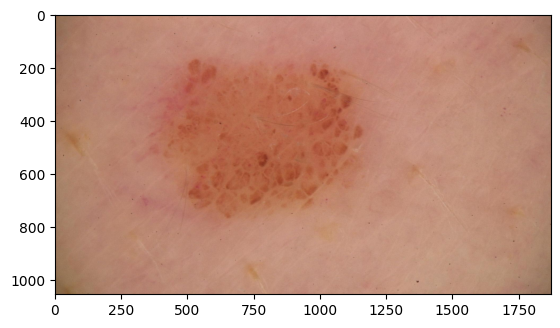

In [ ]:
import requests
import os
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

API_BASE_URL = "https://api.isic-archive.com/api/v2/images"
image_id = "ISIC_4312841"
# Görsel URL'sini al
image_url = f"{API_BASE_URL}/{image_id}"

response = requests.get(image_url, timeout=30)
response.raise_for_status()

# Dosya uzantısını belirle
content_type = response.headers.get('content-type', '')
if 'jpeg' in content_type or 'jpg' in content_type:
    ext = '.jpg'
elif 'png' in content_type:
    ext = '.png'
else:
    ext = '.jpg'  # varsayılan

# Dosyayı kaydet
filename = f"{image_id}{ext}"
filepath = os.path.join(filename)

image_url = response.json()['files']['full']['url']
byte_img = requests.get(image_url, timeout=30)
with open(filepath, 'wb') as f:
    f.write(byte_img.content)
    
plt.imshow(Image.open(BytesIO(byte_img.content)))

In [85]:
import requests
from concurrent.futures import ThreadPoolExecutor
import time
combined_dataset['archive_label'] = None

def get_archive_label(row):
    """
    Her bir satır için API'den benign_malignant bilgisini çeker.
    """
    image_id = row['image']
    image_url = f"{API_BASE_URL}/{image_id}"
    try:
        response = requests.get(image_url, timeout=30)
        response.raise_for_status()
        archive_label = response.json()['metadata']['clinical']['benign_malignant']
        return archive_label
    except Exception as e:
        return "error"

# API ana URL'si
API_BASE_URL = "https://api.isic-archive.com/api/v2/images"

start_time = time.time()

# ThreadPoolExecutor ile etiketleri alıyoruz
with ThreadPoolExecutor(max_workers=10) as executor:
    # DataFrame'in her satırını liste olarak gönderiyoruz.
    labels = list(executor.map(get_archive_label, [row for idx, row in combined_dataset.iterrows()]))

end_time = time.time()
duration = end_time - start_time
print(f"\nAPI sorguları tamamlandı, süre: {duration:.2f} saniye")

# Alınan API etiket bilgisini DataFrame'e yazıyoruz.
combined_dataset['archive_label'] = labels

combined_dataset['match'] = combined_dataset.apply(lambda row: row['archive_label'].lower() == row['label'].lower(), axis=1)

# İlk birkaç satırı ve eşleşme özetini yazdırıyoruz.
print(combined_dataset[['image', 'label', 'archive_label', 'match']].head())
print("\nEşleşme Özeti:")
print(combined_dataset['match'].value_counts())


API sorguları tamamlandı, süre: 693.05 saniye
          image     label archive_label  match
0  ISIC_0000002  melanoma     malignant  False
1  ISIC_0000004  melanoma     malignant  False
2  ISIC_0000013  melanoma     malignant  False
3  ISIC_0000074  melanoma     malignant  False
4  ISIC_0000157  melanoma     malignant  False

Eşleşme Özeti:
match
False    4733
True     4731
Name: count, dtype: int64


In [87]:
combined_dataset['label2'] = combined_dataset['label'].copy()
combined_dataset['label2'] = combined_dataset['label2'].replace({'melanoma': 'malignant'})
combined_dataset['match2'] = combined_dataset.apply(lambda row: row['archive_label'].lower() == row['label2'].lower(), axis=1)

combined_dataset

,image,dataset,label,archive_label,match,label2,match2
0,ISIC_0000002,ISIC_2019,melanoma,malignant,False,malignant,True
1,ISIC_0000004,ISIC_2019,melanoma,malignant,False,malignant,True
2,ISIC_0000013,ISIC_2019,melanoma,malignant,False,malignant,True
3,ISIC_0000074,ISIC_2019,melanoma,malignant,False,malignant,True
4,ISIC_0000157,ISIC_2019,melanoma,malignant,False,malignant,True
...,...,...,...,...,...,...,...
9459,ISIC_3981425,ISIC_2020,benign,benign,True,benign,True
9460,ISIC_7199167,ISIC_2020,benign,benign,True,benign,True
9461,ISIC_2906486,ISIC_2020,benign,benign,True,benign,True
9462,ISIC_6143791,ISIC_2020,benign,benign,True,benign,True


In [88]:
combined_dataset['match2'].value_counts()

match2
True     9463
False       1
Name: count, dtype: int64

In [89]:
combined_dataset[combined_dataset['archive_label'] != combined_dataset['label2']]

,image,dataset,label,archive_label,match,label2,match2
6818,ISIC_0010246,ISIC_2019,benign,indeterminate/benign,False,benign,False


In [35]:
test_dataset['image_path'][0]

'../data/processed/artefact_removal/ISIC_0070709.jpg'